# **KNN**

## **1. Loading libraries**

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

## **2. Loading dataset**

In [32]:
df = pd.read_csv('cancer.csv')

## **3. Exploratory data analysis**

### **3-(1). Data Information**

In [33]:
print(df.head())
print(df.shape)
print(df.info())

        Id  Clump_thickness  Uniformity_Cell_Size  Uniformity_Cell_Shape  \
0  1000025                5                     1                      1   
1  1002945                5                     4                      4   
2  1015425                3                     1                      1   
3  1016277                6                     8                      8   
4  1017023                4                     1                      1   

   Marginal_Adhesion  Single_Epithelial_Cell_Size Bare_Nuclei  \
0                  1                            2           1   
1                  5                            7          10   
2                  1                            2           2   
3                  1                            3           4   
4                  3                            2           1   

   Bland_Chromatin  Normal_Nucleoli  Mitoses  Class  
0                3                1        1      2  
1                3                2        1

In [34]:
df.Id.unique()

array([ 1000025,  1002945,  1015425,  1016277,  1017023,  1017122,
        1018099,  1018561,  1033078,  1035283,  1036172,  1041801,
        1043999,  1044572,  1047630,  1048672,  1049815,  1050670,
        1050718,  1054590,  1054593,  1056784,  1057013,  1059552,
        1065726,  1066373,  1066979,  1067444,  1070935,  1071760,
        1072179,  1074610,  1075123,  1079304,  1080185,  1081791,
        1084584,  1091262,  1096800,  1099510,  1100524,  1102573,
        1103608,  1103722,  1105257,  1105524,  1106095,  1106829,
        1108370,  1108449,  1110102,  1110503,  1110524,  1111249,
        1112209,  1113038,  1113483,  1113906,  1115282,  1115293,
        1116116,  1116132,  1116192,  1116998,  1117152,  1118039,
        1120559,  1121732,  1121919,  1123061,  1124651,  1125035,
        1126417,  1131294,  1132347,  1133041,  1133136,  1136142,
        1137156,  1143978,  1147044,  1147699,  1147748,  1148278,
        1148873,  1152331,  1155546,  1156272,  1156948,  1157

In [35]:
df.drop(columns=['Id'], inplace = True)

**&rarr; 'Id' 열은 의사가 환자를 식별하기 위해 부여한 고유 번호로, 클래스에 따라 데이터를 분류할 때 유의미한 정보를 제공하지 않는다. <br>
   모델의 학습과 예측에 도움이되지 않는다고 판단하여 삭제하였다.**

In [36]:
df.Bare_Nuclei.unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

**&rarr; 'Bare_Nuclei' 열만 데이터 타입이 object형으로 나타나 어떤 고유값들을 가지는지 확인하였다. <br>
그 결과 '?'라는 결측치가 존재함을 알 수 있다.**

### **3-(2). Class Inbalance?**

In [37]:
print(df['Class'].value_counts())
print()
print(df['Class'].value_counts()/np.float64(len(df)))

Class
2    458
4    241
Name: count, dtype: int64

Class
2    0.655222
4    0.344778
Name: count, dtype: float64


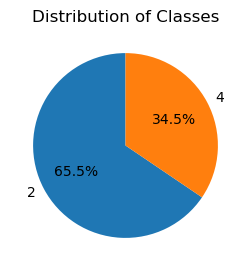

In [38]:
class_counts = df['Class'].value_counts()

plt.figure(figsize=(3, 3))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90) # 보기 편하도록 각도 지정
plt.title('Distribution of Classes')
plt.show()

**class의 불균형이 있을시 편향된 결과가 도출될 수 있어 모델을 만들 필요가 없다. <br>
때문에 class의 불균형이 있는지 확인하는 작업이 필요하다. <br>
파이 차트를 확인해보면 class의 값이 2인 데이터가 65.5%, 4인 데이터가 34.5%로 약간의 불균형은 있지만, <br>
이 점을 감안하고 계속 진행하기로 판단하였다.**

### **3-(3). Exploratory data analysis: Missing Data?**

In [39]:
print(df.isnull().sum())

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64


**누락된 데이터가 존재하는지 확인한 결과, null값이 존재하지 않음을 알 수 있다. <br>
하지만, 앞서 Bare_Nuclei 열에 '?'라는 결측치가 존재하는 것을 확인하였다. <br>
때문에 이 결측치를 처리해야 한다.**

In [40]:
(df['Bare_Nuclei'] == '?').sum()

16

In [41]:
df.drop(df[df.Bare_Nuclei == '?'].index, inplace = True)

**결측치를 처리하는 방식으로 누락된 데이터가 존재하는 행을 모두 삭제하는 방식을 선택하였다.<br>
 총 데이터 크기에서 16개의 행을 삭제하는 것은 데이터의 손실이 크지 않다고 판단했고, <br>
의료데이터 특성상 결측치를 다른 값으로 대체하는 방식은 타당하지 않다고 생각했기 때문이다.**

In [42]:
df["Bare_Nuclei"] = df["Bare_Nuclei"].astype(int)

**&rarr; 결측치를 삭제한 후, 데이터 분석에 더 유용하게 사용하기 위해 'Bare_Nuclei' 열의 데이터를 정수형으로 변환하였다.**

In [43]:
df.Bare_Nuclei.unique()

array([ 1, 10,  2,  4,  3,  9,  7,  5,  8,  6])

In [44]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 683 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump_thickness              683 non-null    int64
 1   Uniformity_Cell_Size         683 non-null    int64
 2   Uniformity_Cell_Shape        683 non-null    int64
 3   Marginal_Adhesion            683 non-null    int64
 4   Single_Epithelial_Cell_Size  683 non-null    int64
 5   Bare_Nuclei                  683 non-null    int32
 6   Bland_Chromatin              683 non-null    int64
 7   Normal_Nucleoli              683 non-null    int64
 8   Mitoses                      683 non-null    int64
 9   Class                        683 non-null    int64
dtypes: int32(1), int64(9)
memory usage: 56.0 KB
None


**&rarr; 이에 따라 '?' 값이 포함되는 열이 삭제되었으며, 'Bare_Nuclei' 열의 데이터가 정수형으로 변환된 것을 확인할 수 있다.**

### **3-(4) Exploratory data analysis: Outliers?**

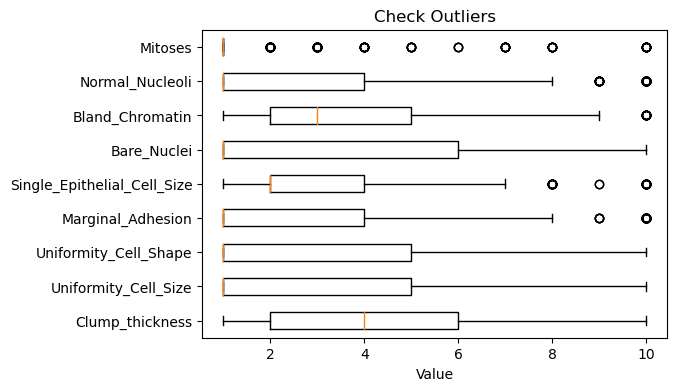

In [49]:
data_to_boxplot = df.iloc[:,:9]
plt.figure(figsize=(6, 4))
plt.boxplot(data_to_boxplot, vert=False)
plt.xlabel('Value')
plt.yticks(range(1, 10), data_to_boxplot.columns)
plt.title('Check Outliers')
plt.show()

**EDA의 마지막 단계로 이상치를 확인하였다. <br>
그 결과, 'Mitoses', 'Normal_Nucleoil', 'Bland_Chromatin', 'Single_Epithelial_Cell_Size', 'Marginal_Adhesion' 열에서 이상치가 존재했다. <br>
하지만 의료데이터의 특성에 따라 필요할 수도 있는 값이라고 판단하여 이상치를 제거하지 않았다.**

## **4. Data Visualization**

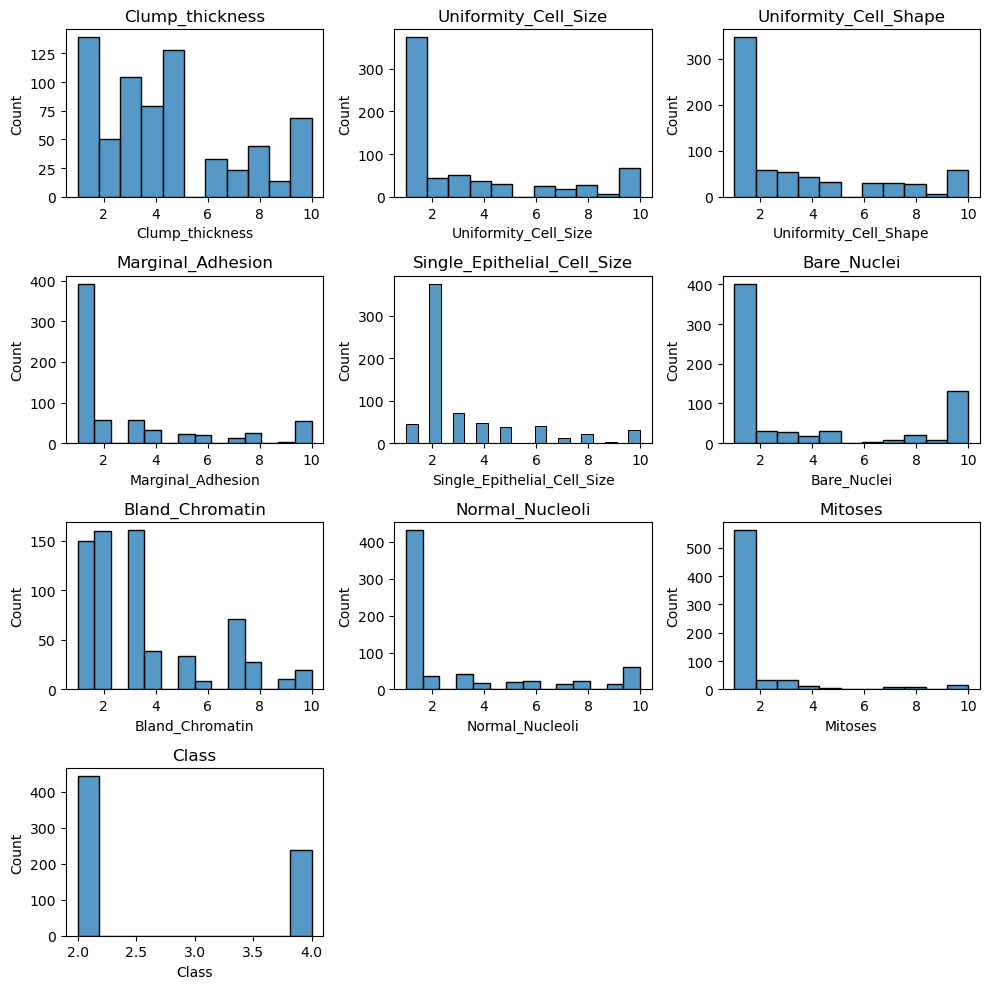

In [16]:
# 각 열에 대한 히스토그램 그리기
plt.figure(figsize=(10, 10))
for i, column in enumerate(df.columns[0:], 1):
    plt.subplot(4,3, i)
    sns.histplot(df[column])  
    plt.title(column)

plt.tight_layout()
plt.show()

**&rarr; EDA를 진행한 후 정제된 데이터셋의 각 열의 데이터 분포를 확인하였다. <br>
훈련할 데이터의 라벨값이 될 'class' 열을 제외한 나머지 열의 데이터 분포는 대부분 작은 값에 몰려있음을 알 수 있다. <br>
이는 앞서 시각화한 박스플랏의 중앙값이 마찬가지로 대부분 앞쪽에(작은 값)에 위치함을 통해도 확인할 수 있다.**

## **5. Splitting into training and testing datasets**

In [17]:
training_points = df.drop(columns=['Class'])
training_labels = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
	training_points, 
	training_labels, 
	test_size=0.3, # train: test = 7:3
	random_state=4)

**'class' 열을 라벨 데이터로 선택하고, 'class' 열을 제외한 나머지 데이터를 학습에 사용하고자 한다. <br>
모델 학습을 위해 훈련데이터와 테스트데이터이 비율은 7:3 비율으로 설정하였다. <br>
훈련데이터는 모델을 훈련하는데 사용하는 데이터이며, 테스트데이터는 모델의 성능을 테스트하기 위해 사용할 데이터다. <br>
동일한 결과를 나타내기 위해 random_state의 값은 4로 지정하였다.**

## **6. Training model**

Fit K Neighbours Classifier to the training set

In [18]:
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)
guesses = classifier.predict(X_test)

print(guesses)

[2 4 2 4 2 2 2 2 4 2 2 4 4 4 4 2 2 2 2 2 4 2 4 4 4 4 2 2 4 4 4 2 4 2 2 2 4
 2 2 2 2 2 2 4 4 2 2 2 2 4 2 2 2 2 2 2 4 2 2 2 2 4 4 2 4 4 4 2 2 2 4 4 2 2
 2 4 2 2 4 4 2 2 2 2 4 4 2 4 2 2 2 4 2 2 2 4 2 2 2 4 2 4 2 2 4 2 4 2 2 4 2
 2 4 2 2 2 2 2 4 4 4 4 4 2 2 4 2 2 4 2 4 2 2 2 2 2 4 4 2 2 4 4 2 2 2 2 4 4
 2 4 2 2 4 4 4 4 2 2 4 2 2 2 4 2 4 4 2 4 4 2 2 4 2 2 2 2 2 2 4 2 2 2 4 4 4
 4 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4]


**데이터의 학습에는 k-NN 분류기를 사용하였으며, k 값(이웃의 개수)을 5로 설정하였다. <br>
학습 데이터에 대한 모델 훈련을 진행한 후, 테스트 데이터로 예측을 수행하고 결과를 출력하였다.**

## **7. Checking out accuracy**


In [19]:
# ex) n_neighbors = 5
print(confusion_matrix(y_test, guesses))
print(metrics.accuracy_score(y_test, guesses))

[[125   7]
 [  3  70]]
0.9512195121951219


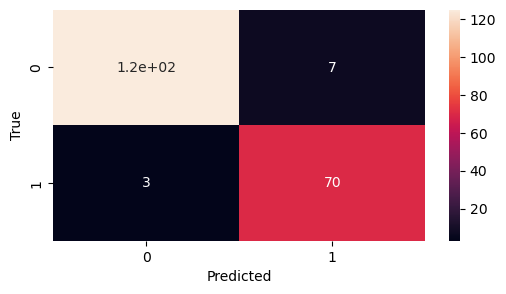

In [20]:
plt.figure(figsize=(6, 3))
sns.heatmap(confusion_matrix(y_test, guesses), annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

 **실제 라벨 값과 모델의 예측 결과를 사용하여 혼동 행렬을 생성하였다. <br>
이는 예측 결과가 실제 클래스에 얼마나 일치하고 얼마나 틀렸는지를 나타내는 행렬이며, <br>
왼쪽 위부터 오른쪽 아래까지 순서대로 True Negative (TN), False Positive (FP), False Negative (FN), True Positive (TP)를 나타낸다.<br>
이를 통해 다음 사실을 파악할 수 있다. <br>**
- Negative를 정확히 예측(TN) : 125개
- Negative로 예측되었지만 실제로는 Positive인 경우(FP) : 7개
- Positive로 예측되었지만 실제로는 Negative인 경우(FN) : 3개
- Positive를 정확히 예측(TN) : 70개
<br>

**정확도(Accuracy)는 전체 샘플 개수(TN+FP+FN+TP) 중에서 올바르게 예측한 샘플(TP+TN)의 비율로, <br>
위 모델 학습결과 약 95%의 정확도를 나타내었다.**

## **8. Improving Accuracy** 

### **8-(1). Tuning k parameter**

[0.9512195121951219, 0.9463414634146341, 0.9609756097560975, 0.9560975609756097, 0.9512195121951219, 0.9560975609756097, 0.9512195121951219, 0.9463414634146341, 0.9414634146341463, 0.9463414634146341, 0.9463414634146341, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219, 0.9463414634146341, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219, 0.9560975609756097, 0.9560975609756097, 0.9560975609756097, 0.9512195121951219, 0.9560975609756097, 0.9560975609756097, 0.9560975609756097, 0.9560975609756097, 0.9560975609756097, 0.9560975609756097, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219]

최대 정확도:  0.9609756

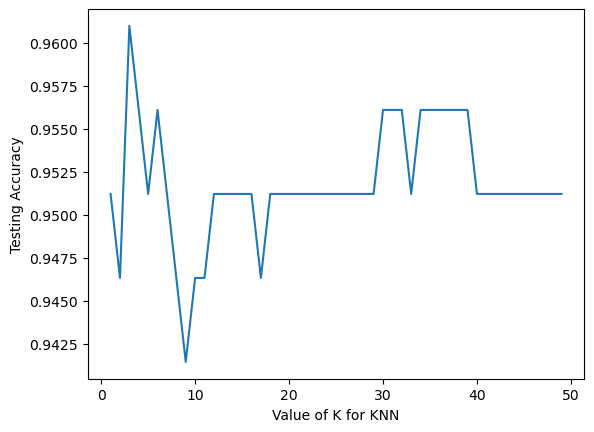

In [21]:
k_range = range(1, 50)

accuracy_scores = []

for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, guesses))
print(accuracy_scores)

max_accuracy = max(accuracy_scores)
max_k = k_range[accuracy_scores.index(max_accuracy)]

print("\n최대 정확도: ",max_accuracy,"k =", max_k)

plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

**모델의 정확도를 높이기 위한 첫 번째 방안으로, k값을 튜닝해보았다. <br>
k값을 1부터 50까지 순차적으로 늘려가면서 최대 정확도가 언제 나타나는지 확인하였다. <br>
튜닝 결과 k값이 3일 때 가장 높은 정확도를 나타내었으며, 그 때의 정확도는 약 96%이다.**

### **8-(2). Changing split ratio**

In [22]:
training_points = df.drop(columns=['Class'])
training_labels = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
	training_points, 
	training_labels, 
	test_size=0.2, # train: test = 8:2
	random_state=4)

[0.9781021897810219, 0.9562043795620438, 0.9708029197080292, 0.9708029197080292, 0.9708029197080292, 0.9854014598540146, 0.9854014598540146, 0.9854014598540146, 0.9708029197080292, 0.9854014598540146, 0.9708029197080292, 0.9708029197080292, 0.9708029197080292, 0.9781021897810219, 0.9635036496350365, 0.9854014598540146, 0.9854014598540146, 0.9854014598540146, 0.9854014598540146, 0.9854014598540146, 0.9854014598540146, 0.9854014598540146, 0.9854014598540146, 0.9854014598540146, 0.9854014598540146, 0.9854014598540146, 0.9854014598540146, 0.9854014598540146, 0.9854014598540146, 0.9854014598540146, 0.9854014598540146, 0.9854014598540146, 0.9854014598540146, 0.9854014598540146, 0.9854014598540146, 0.9854014598540146, 0.9854014598540146, 0.9854014598540146, 0.9854014598540146, 0.9854014598540146, 0.9854014598540146, 0.9854014598540146, 0.9854014598540146, 0.9854014598540146, 0.9854014598540146, 0.9854014598540146, 0.9854014598540146, 0.9781021897810219, 0.9781021897810219]

최대 정확도:  0.9854014

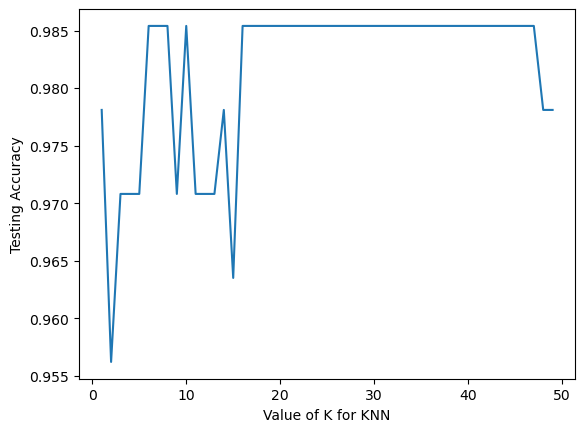

In [23]:
k_range = range(1, 50)

accuracy_scores = []

for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, guesses))
print(accuracy_scores)

max_accuracy = max(accuracy_scores)
max_k = k_range[accuracy_scores.index(max_accuracy)]

print("\n최대 정확도: ",max_accuracy,"k =", max_k)

plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

**모델의 정확도를 높이기 위한 두 번째 방안으로, 훈련데이터와 테스트데이터의 비율을 바꾸어보았다. <br>
훈련데이터의 양을 늘려 두 데이터의 비율을 8:2로 변경하였다. <br>
가장 높은 정확도를 구하기 위해 k값 튜닝도 같이 진행한 결과, <br>
k값이 6일 때 가장 높은 정확도를 나타내었으며, 그 때의 정확도는 약 98%이다. <br>
훈련데이터와 테스트 데이터의 비율을 바꾼 결과, 최대 정확도가 98%로, 이전보다 높은 정확도를 구할 수 있었다.**

### **8-(3). Feature Engineering**

<Axes: >

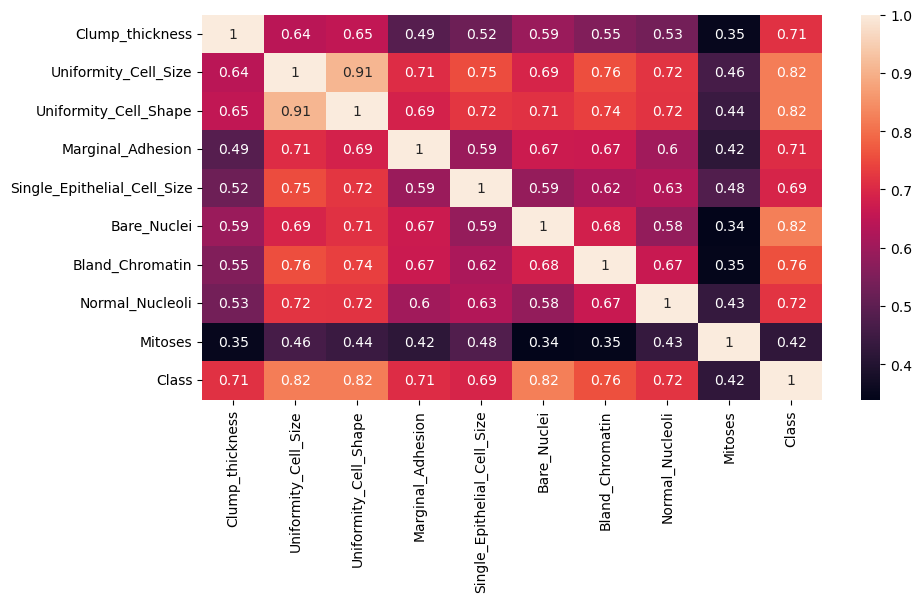

In [27]:
dfcorr = df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(data = dfcorr, annot=True)

**각 Feature 간의 상관관계를 히트맵으로 시각화한 결과는 위의 그래프와 같다. <br>
모델의 정확도를 높이기 위한 방법 중 세 번째로, 상관관계가 낮은 칼럼을 삭제하는 방법이 있다. <br>
상관관계가 0에 가까워질수록 필요성이 낮아진다고 할 수 있는데 <br>
라벨 데이터인 'class'열과 다른 Feature 간의 상관관계를 확인한 결과 0에 가까운 값을 가지는 칼럼이 없다고 판단하였다. <br>
때문에 이 과정은 생략하였다.**

### **8-(4). Feature Scaling**

In [25]:
df.describe()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


**모델의 정확도를 높이기 위한 방법 중 네 번째로, Feature Scaling을 말할 수 있다. <br>
하지만, 이 데이터의 경우 칼럼 간의 단위 차이가 크지 않다고 판단한다. <br>
때문에 정규화 작업도 생락하였다.**

## **Conclusion**

UCI_Breast Cancer Wisconsin 데이터셋을 활용하여 k-NN 분류기를 사용해 모델 학습을 진행하였다. <br>
모델의 정확도를 향상시키기 위해 다양한 방법을 적용한 결과 훈련데이터와 테스트데이터의 비율을 8:2로 지정했을 때, <br>
k값이 6인 경우 약 98%로 가장 높은 정확도를 얻어낼 수 있었다. <br>